<a href="https://colab.research.google.com/github/shubhanshu1995/Deep-Learning-with-Keras/blob/master/MNIST_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Handwritten Digits Classification using Keras, Tensorflow & Python**

In [0]:
import tensorflow as tf
from keras import datasets

In [0]:
mnist = datasets.mnist  # 28x28 grayscale images of hand-written digits 0-9

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = X_test.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ")")
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000
Height/Width of each image: num_px = 28
Each image is of size: (28, 28)
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


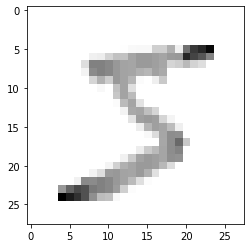

In [11]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = plt.cm.binary)

###**One common preprocessing step in machine learning is to center and normalize your dataset, meaning that you substract the minimum of the whole numpy array from each example, and then divide each example by the difference of maximum & minimum of the whole numpy array. So for picture datasets, we'll just divide every row of the dataset by 255 (the maximum value of a pixel channel).**

###**Normalization rescales the values into a range of [0,1]**

###**Let's normalize our dataset using Keras utility.**

In [0]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

# **Model Architecture**

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# **Training**

In [15]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2657 - acc: 0.9223
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1086 - acc: 0.9657
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0747 - acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0554 - acc: 0.9821
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0419 - acc: 0.9865
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0313 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0263 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0215 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0191 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 

# **Validation Loss & Validation Accuracy**

In [16]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation Loss: {}\nValidation Accuracy: {}".format(val_loss, val_acc))

10000/10000 [==============================] - 0s 34us/sample - loss: 0.1083 - acc: 0.9743
Validation Loss: 0.1083435316722811
Validation Accuracy: 0.9743000268936157


# **Saving a model**

In [0]:
model.save("Awesome_Digits_Reader.h5")

# **Loading a saved model**

In [0]:
new_model = tf.keras.models.load_model("Awesome_Digits_Reader.h5")

# **Prediction on the test set**

In [0]:
predictions = new_model.predict([X_test])

In [21]:
print(predictions.shape)

(10000, 10)


In [22]:
print(predictions)

[[2.8216751e-15 2.5428291e-11 1.8666898e-11 ... 1.0000000e+00
  3.6331039e-14 3.7811503e-12]
 [8.5710920e-16 7.3242490e-10 1.0000000e+00 ... 1.7214815e-17
  1.6973264e-12 8.4707940e-21]
 [2.3152339e-12 9.9999344e-01 3.6820267e-09 ... 1.4385361e-07
  6.3251086e-06 3.7480654e-09]
 ...
 [5.8262190e-13 3.3922987e-08 7.3860695e-11 ... 3.1661100e-06
  2.1095806e-10 8.3925688e-06]
 [9.6050377e-15 9.9921944e-15 6.6208364e-14 ... 5.5004807e-13
  3.2889561e-06 8.4408383e-12]
 [3.3884619e-13 2.0650001e-11 3.8852539e-13 ... 1.3400155e-18
  1.7181875e-10 1.7045214e-13]]


In [23]:
import numpy as np

print(np.argmax(predictions[4])) 

4


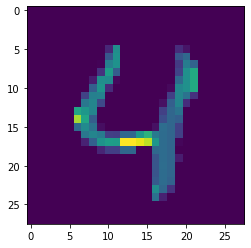

In [24]:
plt.imshow(X_test[4])
plt.show()